In [1]:
#Stock Market (S&P 500) Sigma (standard deviation) Analysis
#created by John Broberg on 2022-05-29

#source: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd Desktop/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1655039414586.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,06/10/2022,3900.86,--,3974.39,3974.39,3900.16
1,06/09/2022,4017.82,--,4101.65,4119.10,4017.17
2,06/08/2022,4115.77,--,4147.12,4160.14,4107.20
3,06/07/2022,4160.68,--,4096.47,4164.86,4080.19
4,06/06/2022,4121.43,--,4134.72,4168.78,4109.18
...,...,...,...,...,...,...
2545,06/18/2012,1344.78,--,1342.42,1348.22,1334.46
2546,06/15/2012,1342.84,--,1329.19,1343.32,1329.19
2547,06/14/2012,1329.10,--,1314.88,1333.68,1314.14
2548,06/13/2012,1314.88,--,1324.02,1327.28,1310.51


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2550.000000,2550.000000,2550.000000,2550.000000
mean,2593.452812,2569.981796,2583.141251,2555.578063
std,874.743940,918.089099,923.809627,911.436892
min,1313.720000,0.000000,0.000000,0.000000
25%,1972.762500,1965.110000,1976.460000,1954.645000
50%,2396.440000,2394.365000,2401.170000,2383.755000
75%,2984.757500,2984.110000,2998.932500,2970.005000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2550 non-null   object 
 1   Close/Last  2550 non-null   float64
 2   Volume      2550 non-null   object 
 3   Open        2550 non-null   float64
 4   High        2550 non-null   float64
 5   Low         2550 non-null   float64
dtypes: float64(4), object(2)
memory usage: 119.7+ KB


In [4]:
df.shape

(2550, 6)

In [5]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

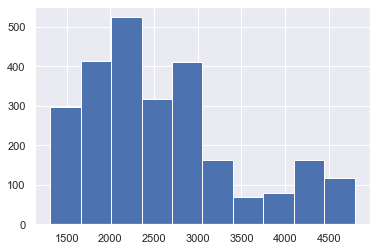

In [6]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [7]:
close_current = df['Close/Last'].iloc[0]
close_current

3900.86

In [8]:
close_mean = df['Close/Last'].mean()
close_mean

2593.452811764716

In [9]:
close_sd = df['Close/Last'].std()
close_sd

874.7439401147143

In [10]:
sigma1 = close_mean + close_sd
sigma1

3468.1967518794304

In [11]:
sigma2 = close_mean + (2 * close_sd)
sigma2

4342.940691994145

In [12]:
sigma3 = close_mean + (3 * close_sd)
sigma3

5217.684632108859

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 06/06/2012 to 06/03/2022')

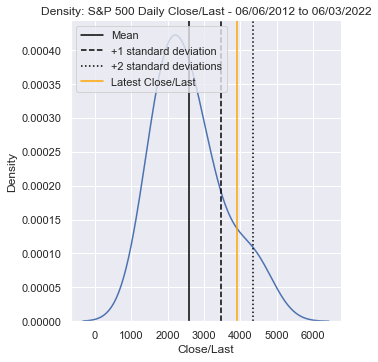

In [13]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df['Close/Last'], kind='kde', bw_adjust=3.0) 

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title('Density: S&P 500 Daily Close/Last - 06/12/2012 to 06/10/2022')

In [14]:
z_score = (close_current - close_mean)/close_sd
z_score

1.494617028228661

In [15]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2550 non-null   datetime64[ns]
 1   Close/Last  2550 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.0 KB


Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 06/06/2012 to 06/03/2022')

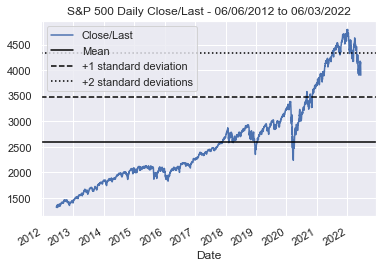

In [16]:
df1.plot(x='Date', y='Close/Last')
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title('S&P 500 Daily Close/Last - 06/12/2012 to 06/10/2022')
